**1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, (working with a ChatBot if needed) create python code explicitly demonstrating your explanation using numpy and scipy.**

Simple Linear Regression is a method used to model the relationship between a predictor (independent variable) and an outcome (dependent variable). It assumes a linear relationship, meaning that the outcome is expected to change in proportion to the predictor. The model includes a slope, which measures how much the predictor affects the outcome, and an intercept, which predicts the value of the outcome when the predictor is zero. Additionally, the residual (random error) represents the distance between the actual data point and the fitted line, reflecting the unexplained variation or error in predicting the outcome for a given predictor value.

The relationship between the predictor variable (X) and the outcome variable (𝑌)  is modeled using the equation Y = β0 + β1X+ ϵ, where β0 is the intercept, β1 is the slope, ϵ is the random error term. The predicted value of Y for a given X is β0 + β1X, which serves as the centre of the distribution for Y. The error term ϵ is assumed to be normally distributed with a mean of 0, meaning that the actual Y values will vary randomly around the predicted value, following a normal distribution pattern. As a result, for any specific value of X, the actual Y values cluster around the predicted value, forming a bell-shaped curve where the mean of the distribution aligns with the predicted value.

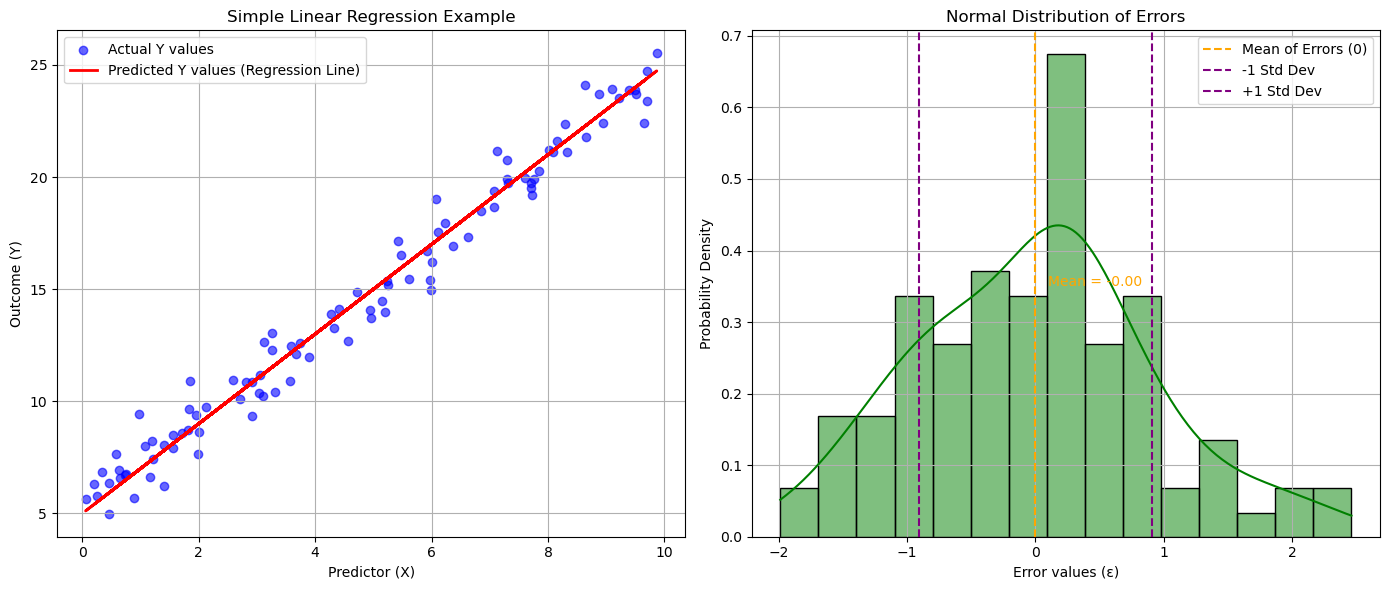

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set a random seed for reproducibility
np.random.seed(42)

# Generate sample data
n = 100  # Number of samples
X = np.random.uniform(0, 10, n)  # Predictor variable
beta_0 = 5  # Intercept
beta_1 = 2  # Slope

# Generate normally distributed errors
epsilon = np.random.normal(0, 1, n)  # Mean = 0, Standard deviation = 1

# Calculate the predicted Y values
Y_pred = beta_0 + beta_1 * X  # Predicted values based on the regression equation

# Calculate actual Y values by adding errors to predicted values
Y_actual = Y_pred + epsilon  # Actual Y values

# Plotting
plt.figure(figsize=(14, 6))

# Scatter plot of actual data points
plt.subplot(1, 2, 1)
plt.scatter(X, Y_actual, label='Actual Y values', color='blue', alpha=0.6)
plt.plot(X, Y_pred, label='Predicted Y values (Regression Line)', color='red', linewidth=2)
plt.title('Simple Linear Regression Example')
plt.xlabel('Predictor (X)')
plt.ylabel('Outcome (Y)')
plt.legend()
plt.grid()

# Overlay the normal distribution of errors
plt.subplot(1, 2, 2)

# Plot the histogram of errors
sns.histplot(epsilon, kde=True, stat='density', color='green', bins=15)
plt.title('Normal Distribution of Errors')
plt.xlabel('Error values (ε)')
plt.ylabel('Probability Density')

# Add mean line and annotations
mean_error = np.mean(epsilon)
plt.axvline(mean_error, color='orange', linestyle='--', label='Mean of Errors (0)')
plt.text(mean_error + 0.1, 0.35, f'Mean = {mean_error:.2f}', color='orange')

# Add standard deviation lines
std_dev_error = np.std(epsilon)
plt.axvline(mean_error - std_dev_error, color='purple', linestyle='--', label='-1 Std Dev')
plt.axvline(mean_error + std_dev_error, color='purple', linestyle='--', label='+1 Std Dev')

plt.legend()
plt.grid()

# Show plots
plt.tight_layout()
plt.show()


**2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf**

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     4065.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           1.35e-81
Time:                        04:27:08   Log-Likelihood:                -131.15
No. Observations:                 100   AIC:                             266.3
Df Residuals:                      98   BIC:                             271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2151      0.170     30.625      0.0

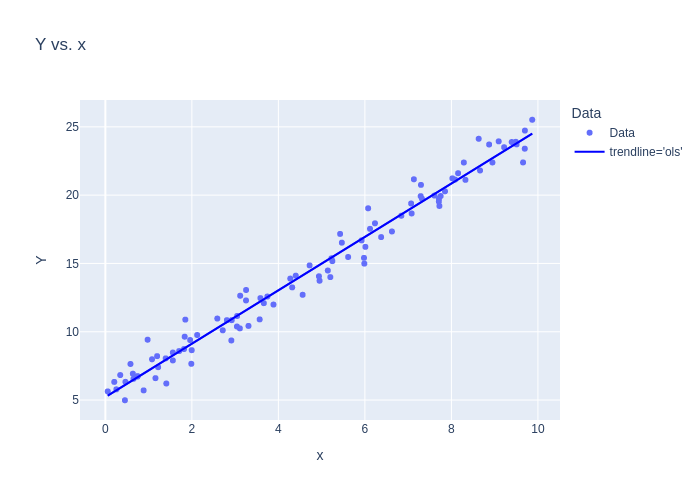

In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Set a random seed for reproducibility
np.random.seed(42)

# Generate sample data
n = 100  # Number of samples
X = np.random.uniform(0, 10, n)  # Predictor variable
beta_0 = 5  # Intercept
beta_1 = 2  # Slope

# Generate normally distributed errors
epsilon = np.random.normal(0, 1, n)  # Mean = 0, Standard deviation = 1

# Calculate the predicted Y values
Y_pred = beta_0 + beta_1 * X  # Predicted values based on the regression equation

# Calculate actual Y values by adding errors to predicted values
Y_actual = Y_pred + epsilon  # Actual Y values

# Combine the simulated x and Y into a pandas DataFrame
df = pd.DataFrame({'x': X, 'Y': Y_actual})

# Use statsmodels to fit the linear regression model
model_data_specification = smf.ols("Y ~ x", data=df)  # Specifies the model using a formula
fitted_model = model_data_specification.fit()  # Fits the model to the data

# Display the summary of the fitted model
print(fitted_model.summary())  # Provides detailed statistics about the regression model

# Summary tables and parameters
print(fitted_model.summary().tables[1])  # Provides coefficients and their statistical significance
print(fitted_model.params)  # Shows the intercept and slope coefficients of the model
print(fitted_model.params.values)  # Provides the coefficient values in an array format
print(fitted_model.rsquared)  # Gives the R-squared value, indicating the proportion of variance explained

# Visualization using plotly
df['Data'] = 'Data'  # Hack to add data to legend
fig = px.scatter(df, x='x', y='Y', color='Data',
                 trendline='ols', title='Y vs. x')

# Add the fitted line to the plot
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

# Show the plot
fig.show(renderer="png")  # Use renderer="png" for submissions


## 3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; but, hint though: simulation of random sampling variation

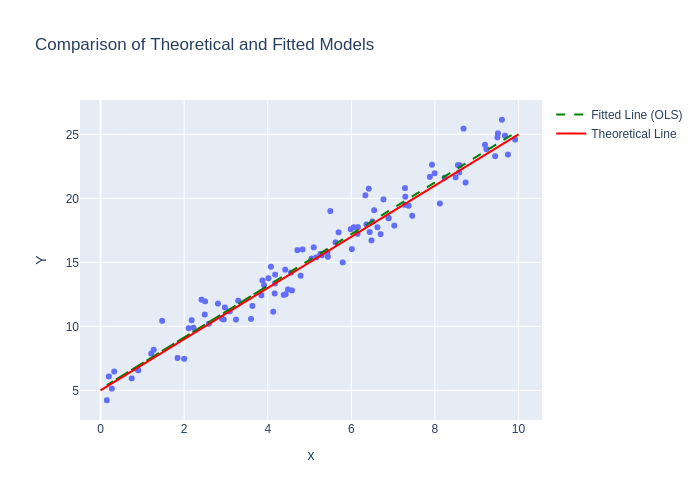

In [3]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

np.random.seed(38)
# Parameters for the theoretical model
n = 100  # Number of observations
beta_0 = 5  # Intercept
beta_1 = 2  # Slope

# Simulate data
X = np.random.uniform(0, 10, n)  # Predictor variable
epsilon = np.random.normal(0, 1, n)  # Normally distributed error
Y_pred = beta_0 + beta_1 * X  # Predicted values based on the regression equation
Y_actual = Y_pred + epsilon  # Actual Y values

# Create a DataFrame
df = pd.DataFrame({'x': X, 'Y': Y_actual})

# Fit the OLS model
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Create a figure with the fitted model line and the theoretical model line
fig = px.scatter(df, x='x', y='Y', title='Comparison of Theoretical and Fitted Models')

# Add the fitted line from the OLS model
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='green', dash='dash'), name="Fitted Line (OLS)")

# Add the theoretical line
x_theoretical = np.linspace(0, 10, 100)  # Generate x values for the theoretical line
y_theoretical = beta_0 + beta_1 * x_theoretical  # Calculate the theoretical y values
fig.add_scatter(x=x_theoretical, y=y_theoretical,
                line=dict(color='red'), name="Theoretical Line")

fig.show(renderer="png")  # Show the figure


Difference between two lines: <br>
- Theoretical: based on the assumed parameters and equation, we create a line that represent the relationship between x and y. To simulate realistic data points around this line, we add an error term drawn from a normal distribution with a mean of 0 to each y-value for the corresponding x-values. By doing that we simulated data points based on a predefined parameters and equations while also accounting for natural variation. <br>
- Fitted: based on the observed data points, we use OLS method to find a line that minimizes the sum of squared distance between actual and predicted y values. BY doing this, we generate a fitted line based on observed data points that has closest linear relationship with the data points.

## 4. Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

The fitted values in fitted_model.fittedvalues are derived from the estimated coefficients stored in fitted_model.params, which are obtained through Ordinary Least Squares (OLS) regression. In the theoretical Simple Linear Regression model Y = β0 + β1X+ ϵ. In contrast, in the fitted model, we use the estimated values β0^ and β1^ calculated from the sample data, to predict 𝑌. These predictions, stored in fitted_model.fittedvalues, are computed as Y1^ = β0^ + β1^xi without accounting for any random error term. Thus, fitted_model.fittedvalues represents the predicted values for each observation based solely on the estimated coefficients, illustrating the model's "in-sample" predictions based on observed data.

**5. Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares"**

The line of best fit for the fitted model is chosen based on observed data using the Ordinary Least Squares (OLS) method. This line is determined by estimating the coefficients that best describe the relationship between the independent and dependent variables. OLS requires the sum of the squared distances between the actual and predicted y-values because squaring the residuals prevents positive and negative values from canceling each other out, which could lead to a misfit. By minimizing the sum of squared residuals, the method ensures a more accurate representation of the data.

**6. Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"; and therefore, why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model; and, therefore what the two np.corrcoef(...)[0,1]. 2 expressions capture in the context of Simple Linear Regression models. <br>**
1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum() <br>
fitted_model.rsquared <br>
np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2 <br>
np.corrcoef(Y,x)[0,1]**2<br>

The R squared statistic, known as fitted model R squared, measures the accuracy of a regression model by indicating the proportion of variance in the dependent variable Y explained by the independent variable(s) X. It is calculated as one minus the ratio of the sum of squares of residuals to the total sum of squares. A higher R squared value, closer to one, indicates that the model explains a greater proportion of the variance in Y, suggesting higher accuracy. Conversely, a lower value, closer to zero, implies less explanatory power. However, a high R squared does not imply causation or guarantee the best model fit.

In linear regression, R-squared (found as fitted_model.rsquared in statsmodels) measures the proportion of the total variation in the outcome variable Y that is explained by the model’s predicted values. Specifically, R-squared is calculated as 1 - (RSS / TSS), where RSS (Residual Sum of Squares) represents the unexplained variance (the differences between the actual Y values and the model’s predicted Y values) and TSS (Total Sum of Squares) represents the total variance of Y around its mean. A higher R-squared value means that a larger portion of the variation in Y is captured by the model, which suggests a better fit to the data used to train the model. However, while R-squared gives insight into how well the model fits the data in the sample, it is not a direct measure of prediction accuracy on new data. High R-squared values indicate that the model explains much of the variance in the data it was trained on, but this does not necessarily mean it will perform well on unseen data.

The two expressions, np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2 and np.corrcoef(Y, x)[0,1]**2, both measure the strength of the linear relationship in simple linear regression. They calculate the squared correlation coefficient (R-squared), representing the proportion of variation in Y explained by the model. In simple linear regression, both expressions are equivalent to R-squared, indicating how well Y is explained by x or by the fitted values from the model.

**7. Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data below**

Two assumptions that seem incompatible with this data are:

Linearity: The scatter plot suggests a non-linear relationship between fertilizer amount and crop yield, which violates the assumption of a linear relationship. The scatter plot appears to show a non-linear pattern, where crop yield increases at a faster rate as the amount of fertilizer increases, suggesting a possible curvilinear or exponential relationship rather than a linear one.

Homoscedasticity: The residuals appear to vary in spread across fertilizer levels as illustrated in the histogram of residuals, indicating heteroscedasticity rather than constant variance.

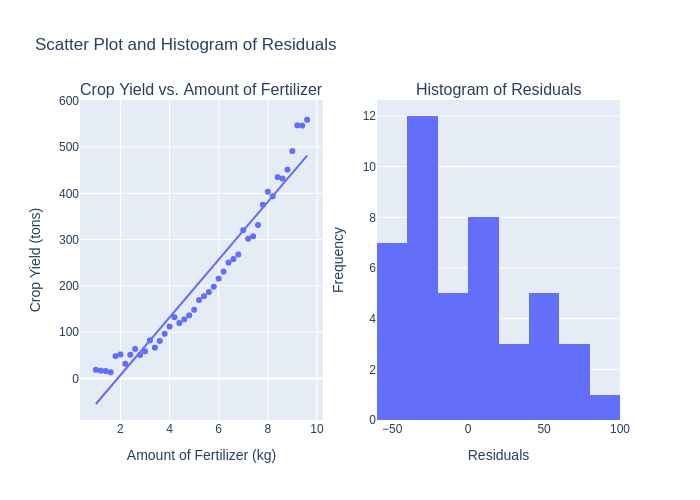

In [4]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png")

**8. Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.**

In [5]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        04:27:09   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The null hypothesis: <br>
On average, there is no linear association between waiting time and eruption duration in the Old Faithful Geyser dataset. (In other words, changes in waiting time would not predict changes in eruption duration if this null hypothesis were true.) and H0: β1 = 0, where β1 is the slope of the regression line for waiting in predicting duration. <br>
- From the OLS report, the predictor waiting has the value of 0.000, which is smaller than 0.05, suggesting a strong evidence against the null hypothesis that there is no linear relationship between waiting time and eruption duration.

## 9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the null hypothesis in the context of short wait times which are less than short_wait_limit values of 62, 64, 66.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


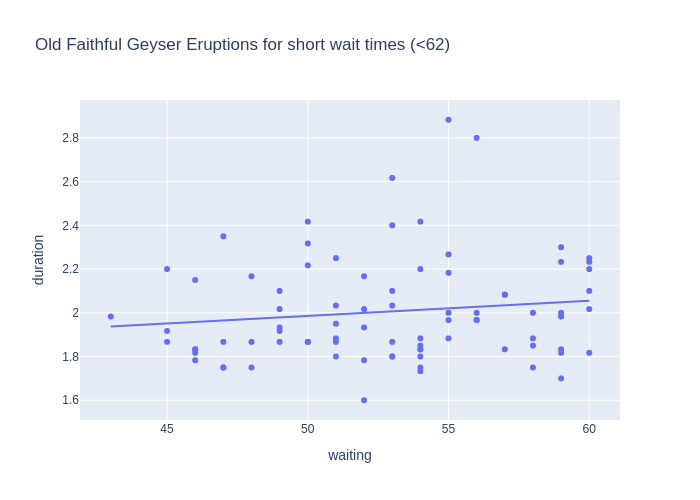

In [6]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png")

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


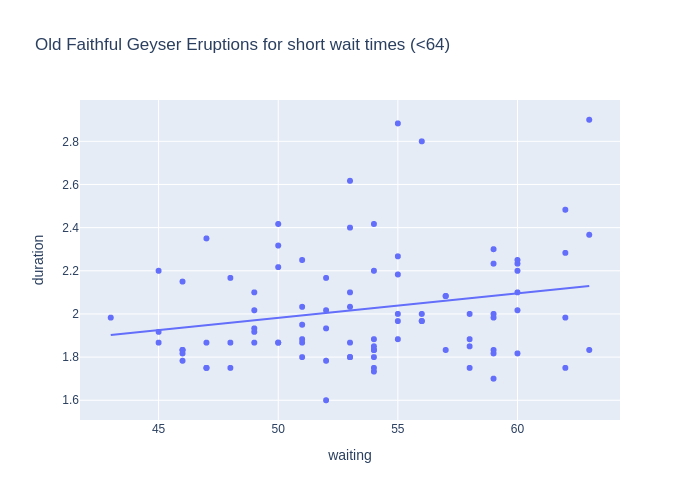

In [7]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 64
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") 

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


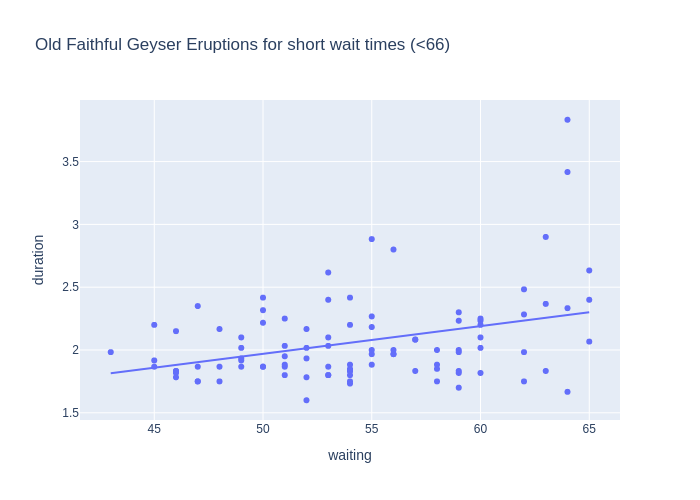

In [8]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66 
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") 

Conclusion: <br>
- For the short wait time with the threshold short_wait_limit values of 62, the p-value is 0.238 < 0.05, therefore we do not have a strong evidence against the null that there is no linear relationship between between duration and wait time <br>
- For the short wait time with the threshold short_wait_limit values of 64, the p-value is 0.036 < 0.05, therefore we do have a moderate evidence against the null that there is no linear relationship between between duration and wait time <br>
- For the short wait time with the threshold short_wait_limit values of 66, the p-value is 0.000 < 0.05, therefore we do have a strong evidence against the null that there is no linear relationship between between duration and wait time 

## 11. Explain the "big picture" differences between this model specification and the previously considered model specifications**
- smf.ols('duration ~ waiting', data=old_faithful)
- smf.ols('duration ~ waiting', data=old_faithful[short_wait])
- smf.ols('duration ~ waiting', data=old_faithful[long_wait])

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


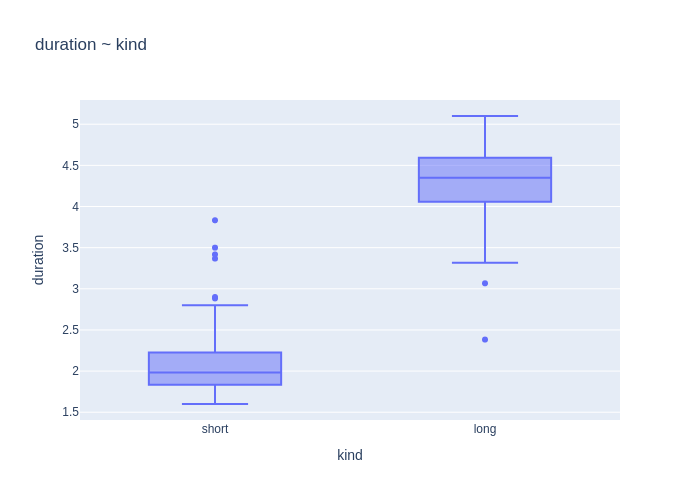

In [9]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png")

- Previous Models: Directly modeled the relationship between continuous waiting time and duration. These models estimated a continuous effect of each additional minute of waiting time on duration, assuming a linear relationship for each subset (or the whole) of the data.<br> 
- New Model: This indicator based model makes the analysis simpler since it separates the waiting times into two categories, "short" and "long," and only assesses whether there is an average difference in duration between these two groups. Instead of modeling the slope of waiting time on duration, it examines the mean difference between "short" and "long" wait times. This model will capture the distinction in the behavior observed at longer wait times
- For the indicator based model, the null hypothesis is "There is no difference in duration between the "short" and "long" wait times.," i.e., 𝛽contrast = 0" <br>
- Conclusion: since the p-value is less than 0.05, (C(kind, Treatment(reference="short"))[T.long] = 0.00 <0.05), we have a strong evidence to reject the null hypothesis, and suggest that there is a difference in eruption duration between "short" and "long" wait times.